# 예측 모델 실습

## auto-mpg.csv 데이터를 통해,  mpg (mile per gallern, 자동차 연비)  를 예측하는 모델을 만드세요.

컬럼 정보 :

MPG (miles per gallon),

cylinders,

engine displacement (cu. inches),

horsepower,

vehicle weight (lbs.),

time to accelerate from O to 60 mph (sec.),

model year (modulo 100),

origin of car (1. American, 2. European,3. Japanese).

Also provided are the car labels (types)

Missing data values are marked by series of question marks.

In [15]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data/auto-mpg.csv')

In [4]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [35]:
df.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [36]:
df['yr'].nunique()

13

In [37]:
df.shape

(392, 9)

In [38]:
df['yr'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [39]:
df['yr'].value_counts()

73    40
78    36
76    34
75    30
82    30
70    29
79    29
72    28
77    28
81    28
71    27
80    27
74    26
Name: yr, dtype: int64

In [40]:
df['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [41]:
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [42]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [44]:
X = df.loc[ : , 'cyl' : 'origin' ]

In [45]:
X

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
387,4,140.0,86,2790,15.6,82,1
388,4,97.0,52,2130,24.6,82,2
389,4,135.0,84,2295,11.6,82,1
390,4,120.0,79,2625,18.6,82,1


In [46]:
y = df['mpg']

In [47]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [50]:
# 모델링

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
regressor = LinearRegression()

In [54]:
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
y_test

195    29.0
55     26.0
279    19.8
347    34.4
192    22.5
       ... 
179    33.0
336    25.8
266    27.2
187    15.5
370    37.0
Name: mpg, Length: 79, dtype: float64

In [59]:
# 비슷한지 확인을 오차로
y_pred

array([29.7468918 , 25.24656243, 25.38009027, 31.92790139, 23.02572851,
       29.96877891, 24.06822826, 11.76125036,  8.89275174, 19.41867362,
       27.30745471, 27.9798695 , 31.15908441, 11.3020954 , 11.8739802 ,
       11.62184032, 26.38481537, 26.43261097, 23.86603241, 28.43353485,
       10.07744602, 19.7807741 , 23.54596598, 20.79579655, 12.51492254,
       20.91786478, 31.91333956, 26.28612779, 34.70815067, 23.41413019,
       18.94332247, 20.26227985, 22.21606653, 28.97602349, 31.05857012,
       24.97526604, 13.94824625, 32.41359164, 10.19369354, 12.78460214,
       10.0137097 , 25.21384429, 22.0039042 , 26.24286387, 28.89648163,
       28.74677777, 30.38784759, 21.24108095, 19.91275264, 22.75668526,
       34.73127036, 23.93652359, 12.27438268, 30.55797989, 22.67426109,
       25.92616478, 13.69159846, 19.09285565, 12.92337932, 20.82101694,
       29.33398527, 24.82841124, 29.11252513, 31.50528431, 25.83043953,
       26.8479398 , 31.80004372, 11.85910752, 30.02656468, 23.09

In [60]:
error = y_test - y_pred

In [62]:
(error ** 2).mean()
# 오차를 더 작게 했으면 더 잘만든 인공지능이다

9.6275928648815

In [63]:
import matplotlib.pyplot as plt

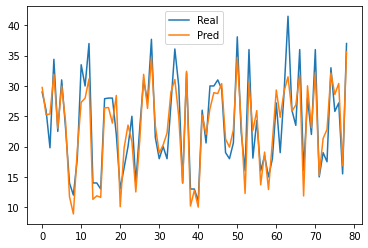

In [64]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Real', 'Pred'])
plt.show()

In [66]:
X.head(2)

,cyl,displ,hp,weight,accel,yr,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1


In [ ]:
# regressor.fit(X_train, y_train)
    # 을 쓴게 밑에 방정식을 세운것

In [67]:
# y = ax1 + bx2 + cx3 + dx4 + ex5 + fx6 + gx7 + h 

In [70]:
regressor.coef_
    # coef = 계수(변수옆에)(a b c d ..)

array([-0.42881044,  0.02280382, -0.02029216, -0.00671778,  0.12538531,
        0.75640088,  1.41013614])

In [71]:
regressor.intercept_

-18.244622141243482

In [ ]:
# y = -0.42881044 x1 + 0.02280382 x2 + .... -18.244622141243482

In [14]:
df.isna().sum()

mpg       0
cyl       0
displ     0
hp        0
weight    0
accel     0
yr        0
origin    0
name      0
dtype: int64

In [6]:
df['name'].nunique()

301

In [7]:
df['cyl'].nunique()

5

In [8]:
df['origin'].nunique()

3

In [10]:
X = df.loc[ : , 'cyl' : 'yr'  ]

In [11]:
y = df['mpg']

In [12]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [19]:
X_train.shape

(313, 6)

In [20]:
X_test.shape

(79, 6)

In [21]:
y_train.shape

(313,)

In [22]:
y_test.shape

(79,)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
regressor = LinearRegression()

In [25]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
y_pred

array([29.63578902, 20.01976113, 18.86649702, 24.41764367, 30.7619203 ,
       27.26928183, 19.94945519, 33.97287477, 22.30458306, 11.77377473,
       11.39156982, 25.48626411, 23.0672135 , 16.84467338, 17.30972532,
       32.71099662, 11.21751366, 26.57049658, 24.48407304, 30.61179466,
       24.87144166, 12.19544275, 19.63080572, 11.80092941, 30.05007835,
       21.48222072, 35.39522406,  8.36567898, 26.95172066, 20.87370554,
       28.85837261, 15.08233025, 27.05788529, 23.07026323, 23.33931883,
       31.62214706, 33.14885094, 28.16473607, 13.81886489, 31.92976622,
       24.30695136, 26.00719669, 23.9251216 , 23.41945176, 17.50840045,
        9.66079444, 28.72057177, 11.56609927, 31.06038291, 21.61343658,
       31.26735126, 25.57563256, 25.78987575,  8.69522899, 22.44536107,
       10.77321814, 15.39406485, 13.85635612, 29.98305728, 32.23574789,
       25.92630193, 13.50742346, 13.87929799, 34.85797303, 10.66348919,
       24.54182778, 22.49499215, 33.86616937, 28.7197787 , 25.24

In [33]:
y_test.values

array([32.9, 18. , 15.5, 20.2, 29.5, 28. , 17. , 29.8, 20.5, 16. , 13. ,
       27.2, 17. , 17. , 16.5, 36.1, 14. , 26. , 17.6, 31. , 24. , 16. ,
       22. , 14. , 25.8, 17.7, 39.1, 11. , 23.2, 21. , 28. , 16. , 25.4,
       23.9, 23. , 32.4, 34. , 21.1, 16. , 41.5, 25. , 27. , 19.4, 24. ,
       17.5, 11. , 23.9, 13. , 39.4, 18. , 32.4, 26. , 20. , 11. , 15. ,
       12. , 16. , 15. , 31.6, 33.8, 19.8, 13. , 16.5, 31. , 14. , 22. ,
       18.1, 36. , 31. , 25. , 28. , 35. , 39. , 21.5, 15. , 15. , 14. ,
       22. , 15.5])

In [34]:
y_test - y_pred

352    3.264211
16    -2.019761
288   -3.366497
281   -4.217644
201   -1.261920
         ...   
10     0.082112
126   -5.071261
74     1.213704
190    0.710497
221   -0.789133
Name: mpg, Length: 79, dtype: float64

In [29]:
error = y_test - y_pred

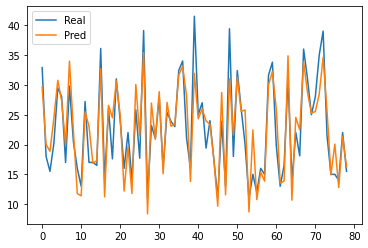

In [31]:
plt.plot(y_test.values)
plt.plot(y_pred)
plt.legend(['Real', 'Pred'])

plt.show()